### **Day 2. Statistics in Single Cell RNA seq data**

We will use R for the remainder of this course, to set your google co lab to R language, change runtime type from Python to R.

We can't mount google drive to co-lab in R runtimes, so upload the X.csv, obs.csv and var.csv to the session storage.

(File icon on the left, then document with arrow on it)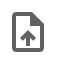

Be aware that if the runtime expires, you will have to reupload these files.
You can avoid your runtime expiring by keeping the co-lab notebook as a separate webpage.

**1. Install and load the required packages**

In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("limma")
install.packages('ggrepel')
install.packages("WebGestaltR")
install.packages('cowplot')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)

Installing package(s) 'BiocVersion', 'limma'

also installing the dependency ‘statmod’


Old packages: 'ggplot2', 'later'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘doRNG’, ‘doParallel’, ‘foreach’, ‘svglite’, ‘igraph’, ‘apcluster’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(limma)
library(ggrepel)
library(WebGestaltR)
library(cowplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


******************************************


*                                        *


*          Welcome to WebGestaltR !      *


*                                        *


******************************************




**1. Read in the 3 csv files**
* X is the expression matrix
* obs is the observations/metadata
* var is the gene names

In [6]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

head(exp_data)
head(metadata)
head(var_data)
nrow(var_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V5842,V5843,V5844,V5845,V5846,V5847,V5848,V5849,V5850,V5851
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
2,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
3,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
4,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
5,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
6,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


,CellID,Patient,Author,Tissue,Disease_stage,Age,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,Celltype
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,sc_b1_A08,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1326,1326,142098,24.09182,36.65006,55.25201,86.71480,0,Secretory Epithelial-1
2,sc_b1_B06,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1599,1599,273240,25.74294,34.62194,47.67201,74.23291,0,Secretory Epithelial-1
3,sc_b1_B08,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2298,2298,193108,24.94614,32.24620,42.47468,62.87777,1,Secretory Epithelial-2
4,sc_b1_B11,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2100,2100,195696,20.84202,29.20755,41.62834,66.75303,0,Secretory Epithelial-1
5,sc_b1_C15,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1793,1793,279434,19.77569,27.73965,39.91712,66.52304,1,Secretory Epithelial-2
6,sc_b1_C18,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1335,1335,328526,27.70253,36.29728,49.93090,78.92983,0,Secretory Epithelial-1


,Gene,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PLEKHN1,127,127,1.582620,97.21308,7212,True,0.01804155,1.833444,0.7781531,0.009044333,0.09574012
2,C1orf159,383,383,11.393461,91.59535,51920,True,0.15081387,1.673782,0.6673490,0.065633356,0.30348997
3,B3GALT6,287,287,4.430546,93.70200,20190,True,0.06731816,1.507138,0.5517003,0.032744878,0.19488919
4,FAM132A,39,39,1.260478,99.14417,5744,True,0.01762634,1.701863,0.6868375,0.007682837,0.10071693
5,SCNN1D,329,329,7.168751,92.78034,32668,True,0.10859225,1.673323,0.6670306,0.047073752,0.25428997
6,PUSL1,425,425,13.996269,90.67369,63781,True,0.15783719,2.050473,0.9287682,0.070341273,0.30717181


[1] 5851

**2. Make the row names of exp_data be CellIDs, and the column names be gene names**

In [13]:
rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene

head(exp_data)

print(sort(colnames(exp_data)))

,PLEKHN1,C1orf159,B3GALT6,FAM132A,SCNN1D,PUSL1,MXRA8,LOC148413,CDK11B,LOC100129534,⋯,DNASE1L1,TAZ,PLXNA3,UBL4A,SLC10A3,GAB3,MPP1,F8,RAB39B,TMLHE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sc_b1_A08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B06,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B11,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_C15,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
sc_b1_C18,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


   [1] "A2M"            "A2M-AS1"        "A2ML1"          "AACS"          
   [5] "AADAT"          "AAR2"           "AARS2"          "AASDH"         
   [9] "AASS"           "ABAT"           "ABCA1"          "ABCA10"        
  [13] "ABCA13"         "ABCA3"          "ABCA6"          "ABCA7"         
  [17] "ABCA8"          "ABCB1"          "ABCB6"          "ABCB8"         
  [21] "ABCB9"          "ABCC1"          "ABCC10"         "ABCC3"         
  [25] "ABCC4"          "ABCC5"          "ABCC6"          "ABCD2"         
  [29] "ABCG1"          "ABCG2"          "ABHD13"         "ABHD15"        
  [33] "ABHD3"          "ABHD4"          "ABHD6"          "ABI3"          
  [37] "ABI3BP"         "ABL1"           "ABL2"           "ABLIM3"        
  [41] "ABR"            "ABTB1"          "ACAA1"          "ACACA"         
  [45] "ACAD10"         "ACAD8"          "ACADL"          "ACAP1"         
  [49] "ACBD4"          "ACCS"           "ACE"            "ACER3"         
  [53] "ACOT11"         "

     KRT17             PTPRC               HMGA1              FOSB        
 Min.   :-0.5438   Min.   :-0.146220   Min.   :-0.6728   Min.   :-0.9510  
 1st Qu.:-0.5438   1st Qu.:-0.146220   1st Qu.:-0.6728   1st Qu.:-0.9510  
 Median :-0.5438   Median :-0.146220   Median :-0.6728   Median :-0.2009  
 Mean   : 0.0000   Mean   :-0.002491   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.1460   3rd Qu.:-0.146220   3rd Qu.: 0.4424   3rd Qu.: 0.8129  
 Max.   : 3.9337   Max.   :10.000000   Max.   : 4.4778   Max.   : 4.5987  

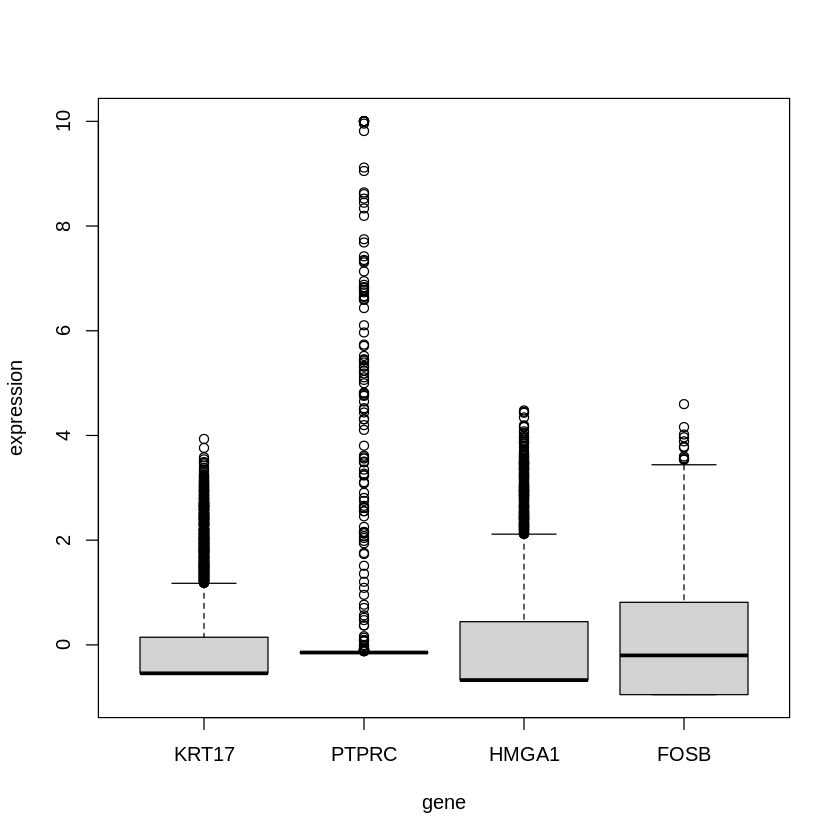

In [20]:
# ["KRT17", "PTPRC", "HMGA1"] ACTB and CLU not in most differentially expressed genes, FOS was also highly expressed
df = exp_data[c("KRT17", "PTPRC", "HMGA1", "FOSB")]
summary(df)
boxplot(df, xlab="gene", ylab="expression")


##**Initial visualisations of the data**
**1. Calculate the total number of cells per patient**


In [ ]:
cells_per_patient <- metadata %>%
  group_by(Patient) %>%
  tally() %>%
  rename('Total_Cells' = 'n')

head(cells_per_patient)

Patient,Total_Cells
<int>,<int>
11543,221
11545,503
11553,650
15066,481
15072,525
33572,481


**2. Use ggplot to plot this as a bar graph**

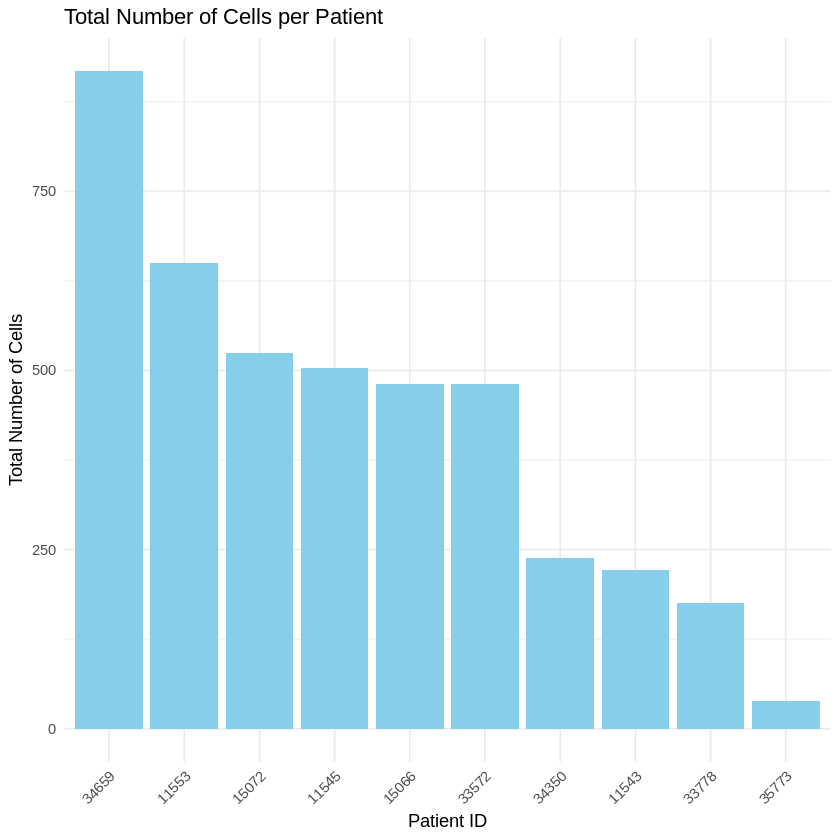

In [ ]:
ggplot(cells_per_patient, aes(x = reorder(Patient, -Total_Cells), y = Total_Cells)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Number of Cells per Patient", x = "Patient ID", y = "Total Number of Cells") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**3. Calculate and plot total cell counts per disease stage**

In [ ]:
cells_per_stage <- metadata %>%
  group_by(Disease_stage) %>%
  tally() %>%
  rename('Total_Cells' = 'n')

head(cells_per_stage)

Disease_stage,Total_Cells
<chr>,<int>
Benign,1850
I,481
IIIc,650
IIIc1,525
IV,724


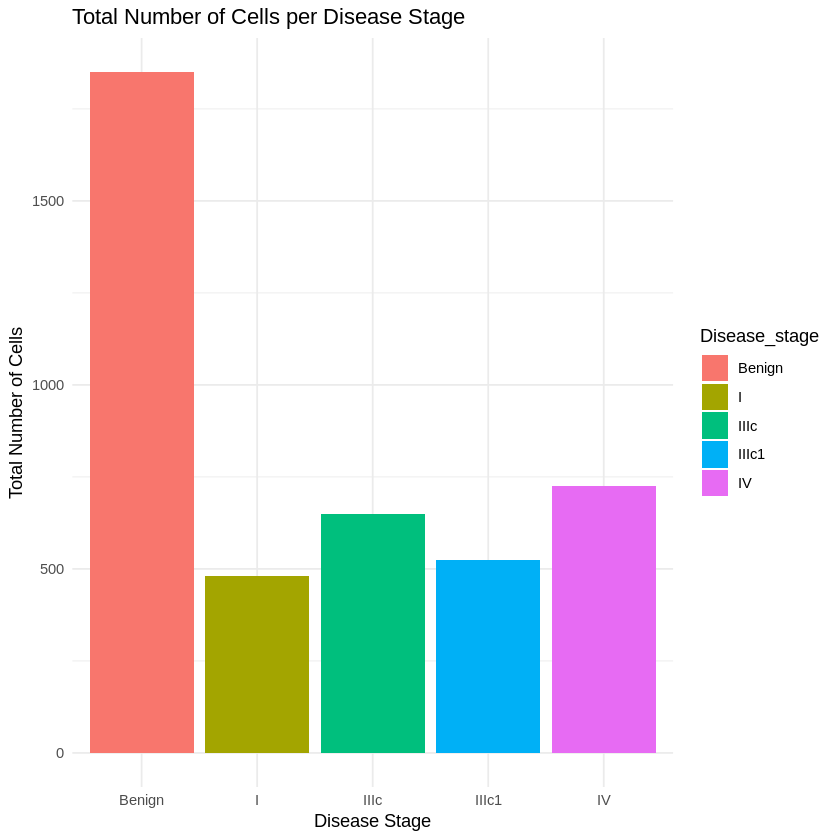

In [ ]:
ggplot(cells_per_stage, aes(x = Disease_stage, y = Total_Cells, fill = Disease_stage)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Number of Cells per Disease Stage", x = "Disease Stage", y = "Total Number of Cells") +
  theme_minimal()

**4. Calculate and plot counts of cell types per disease stage**

In [ ]:
cell_counts <- metadata %>%
  group_by(Celltype, Disease_stage) %>%
  tally() %>%
  rename('Total_Count' = 'n')

cell_counts

Celltype,Disease_stage,Total_Count
<chr>,<chr>,<int>
Ciliated Epithelial,Benign,512
Ciliated Epithelial,I,72
Ciliated Epithelial,IIIc,52
Ciliated Epithelial,IIIc1,9
Ciliated Epithelial,IV,11
Fibroblast,Benign,53
Fibroblast,IIIc,13
Fibroblast,IIIc1,17
Fibroblast,IV,30


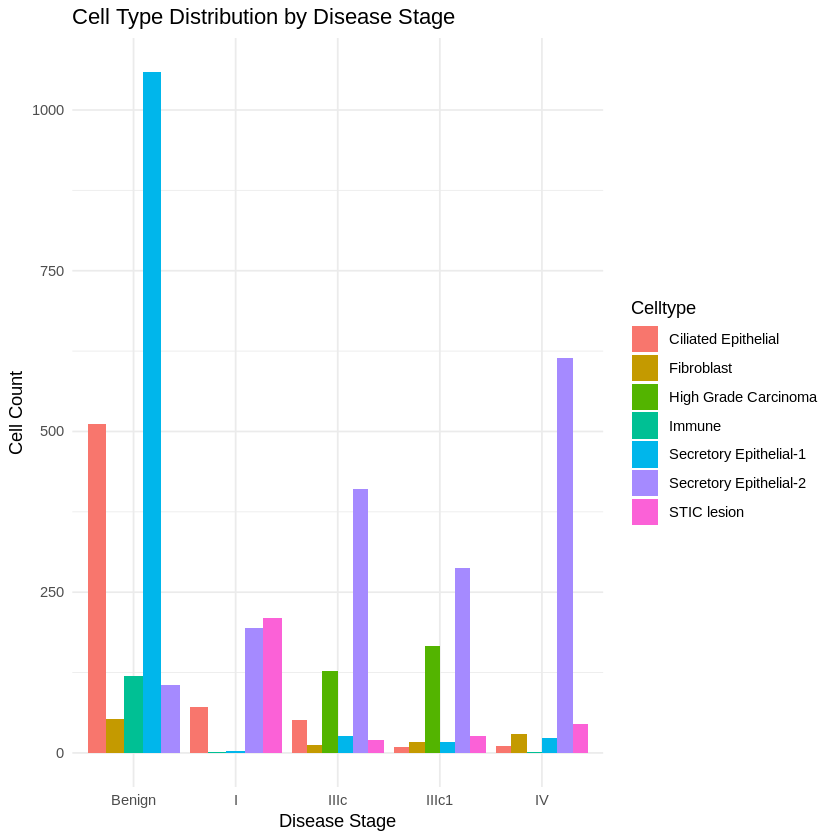

In [ ]:
ggplot(cell_counts, aes(x = Disease_stage, y = Total_Count, fill = Celltype)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Cell Type Distribution by Disease Stage", x = "Disease Stage", y = "Cell Count") +
  theme_minimal()

## **Differential gene expression**
* Perform a differential gene expression test between between Secretory Epithelial-1 and Secretory Epithelial-2 using the limma package

**1. Subset the metadata and expression data to the two secretory epithelial cell types**

In [ ]:
secretorymeta<- subset(metadata, metadata$Disease_stage %in%c('Benign','IV'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

head(secretorymeta)
head(secretoryexp)

,CellID,Patient,Author,Tissue,Disease_stage,Age,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,Celltype
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,sc_b1_A08,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1326,1326,142098,24.09182,36.65006,55.25201,86.71480,0,Secretory Epithelial-1
2,sc_b1_B06,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1599,1599,273240,25.74294,34.62194,47.67201,74.23291,0,Secretory Epithelial-1
3,sc_b1_B08,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2298,2298,193108,24.94614,32.24620,42.47468,62.87777,1,Secretory Epithelial-2
4,sc_b1_B11,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2100,2100,195696,20.84202,29.20755,41.62834,66.75303,0,Secretory Epithelial-1
5,sc_b1_C15,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1793,1793,279434,19.77569,27.73965,39.91712,66.52304,1,Secretory Epithelial-2
6,sc_b1_C18,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1335,1335,328526,27.70253,36.29728,49.93090,78.92983,0,Secretory Epithelial-1


,PLEKHN1,C1orf159,B3GALT6,FAM132A,SCNN1D,PUSL1,MXRA8,LOC148413,CDK11B,LOC100129534,⋯,DNASE1L1,TAZ,PLXNA3,UBL4A,SLC10A3,GAB3,MPP1,F8,RAB39B,TMLHE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sc_b1_A08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B06,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B11,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_C15,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
sc_b1_C18,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


**2.Check dimensions of secretory cell metadata and expression match, do they have the same number of cells?**


In [ ]:
nrow(secretoryexp)
nrow(secretorymeta)

[1] 2574

[1] 2574

**3. Transpose the expression matrix, so columns = cells and rows = genes
(this is the input format required by limma)**
* Check cell IDs match

In [ ]:
secretoryexp <- t(secretoryexp)
identical(colnames(secretoryexp), secretorymeta$CellID)

[1] TRUE

**4. Perform differential gene expression test**

In [ ]:
design <- model.matrix(~ Celltype, data = secretorymeta)
fit <- lmFit(secretoryexp, design)
fit <- eBayes(fit, trend = TRUE)

**5. Print top 20 differentially expressed gene**

In [ ]:
top20genes <- topTable(fit, coef = 2, number = 20)
print(top20genes)

             logFC      AveExpr         t       P.Value     adj.P.Val         B
TIMP3     4.874908 -0.003008572  62.46316  0.000000e+00  0.000000e+00 1178.3894
C20orf85 -2.350417  0.148680881 -55.74299  0.000000e+00  0.000000e+00 1010.1493
SNTN     -2.418341  0.168915486 -52.19152  0.000000e+00  0.000000e+00  920.3331
C1orf194 -2.322522  0.127484637 -51.78068  0.000000e+00  0.000000e+00  909.9240
FAM183A  -2.287417  0.133766461 -50.04659  0.000000e+00  0.000000e+00  865.9768
PIFO     -2.419319  0.138007564 -49.82213  0.000000e+00  0.000000e+00  860.2885
CAPSL    -2.394389  0.130972558 -47.06694  0.000000e+00  0.000000e+00  790.5398
SPARC     4.215435  0.003236112  46.94120  0.000000e+00  0.000000e+00  787.3620
TPPP3    -2.204544  0.129568963 -46.54732  0.000000e+00  0.000000e+00  777.4118
CDHR3    -2.348729  0.146917390 -42.61115 9.244962e-301 5.409227e-298  678.5013
MS4A8B   -2.310883  0.123464613 -42.03428 1.674705e-294 8.907908e-292  664.1153
DCN       4.297790  0.040367779  41.9634

**6. Plot a volcano plot of top 100 differentially expressed genes**

In [ ]:
top_genes_df <- topTable(fit, coef = 2, number = 100)
top_genes_df$significance <- ifelse(top_genes_df$P.Value < 0.05 & abs(top_genes_df$logFC) > 1,
                                    "Significant", "Not Significant")

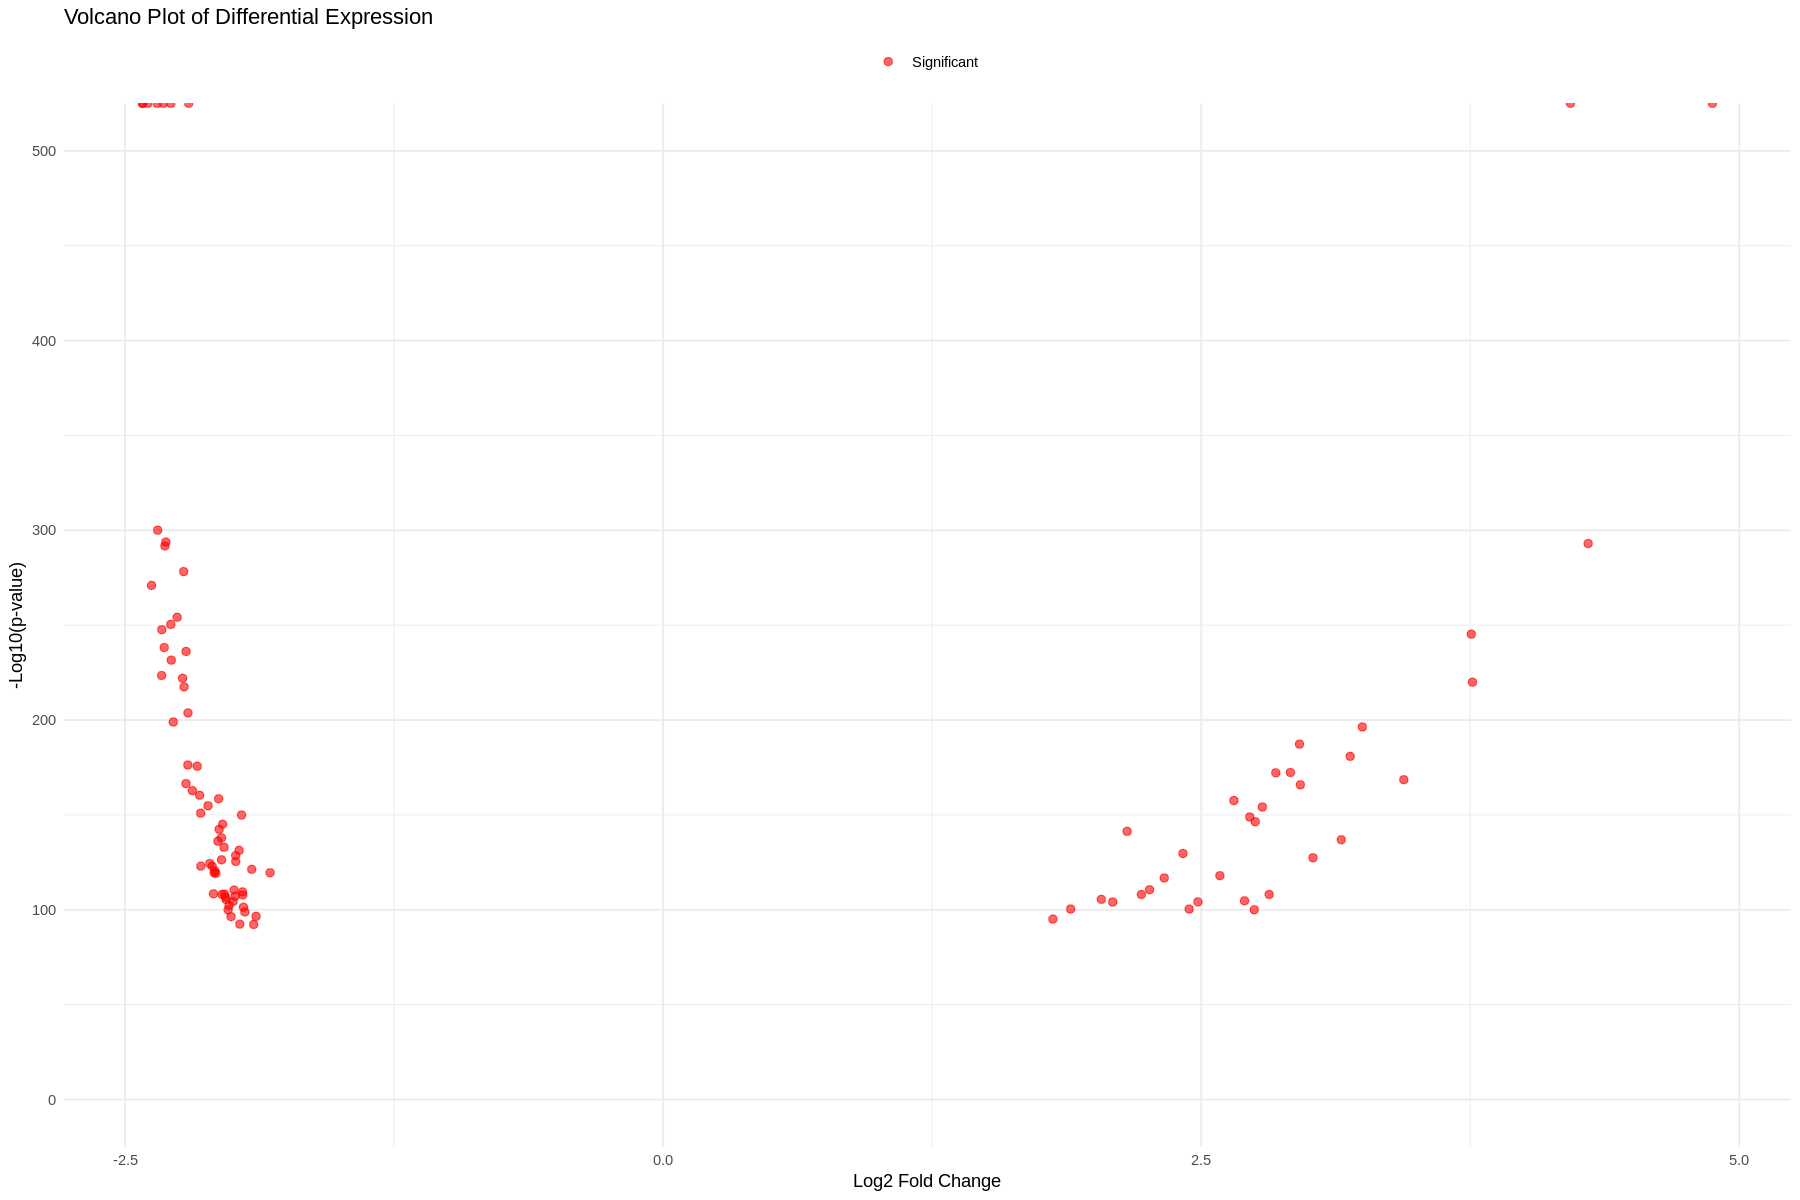

In [ ]:
volcanoplot <- ggplot(top_genes_df, aes(x = logFC, y = -log10(P.Value), color = significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("Not Significant" = "gray", "Significant" = "red")) +
  theme_minimal() +
  ylim(0, 500) +
  labs(title = "Volcano Plot of Differential Expression",
       x = "Log2 Fold Change", y = "-Log10(p-value)") +
  theme(legend.title = element_blank()) +
  theme(legend.position = "top")

volcanoplot

**7. Add gene names to the singificantly differentially expressed genes**

Warning message:
“ggrepel: 83 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


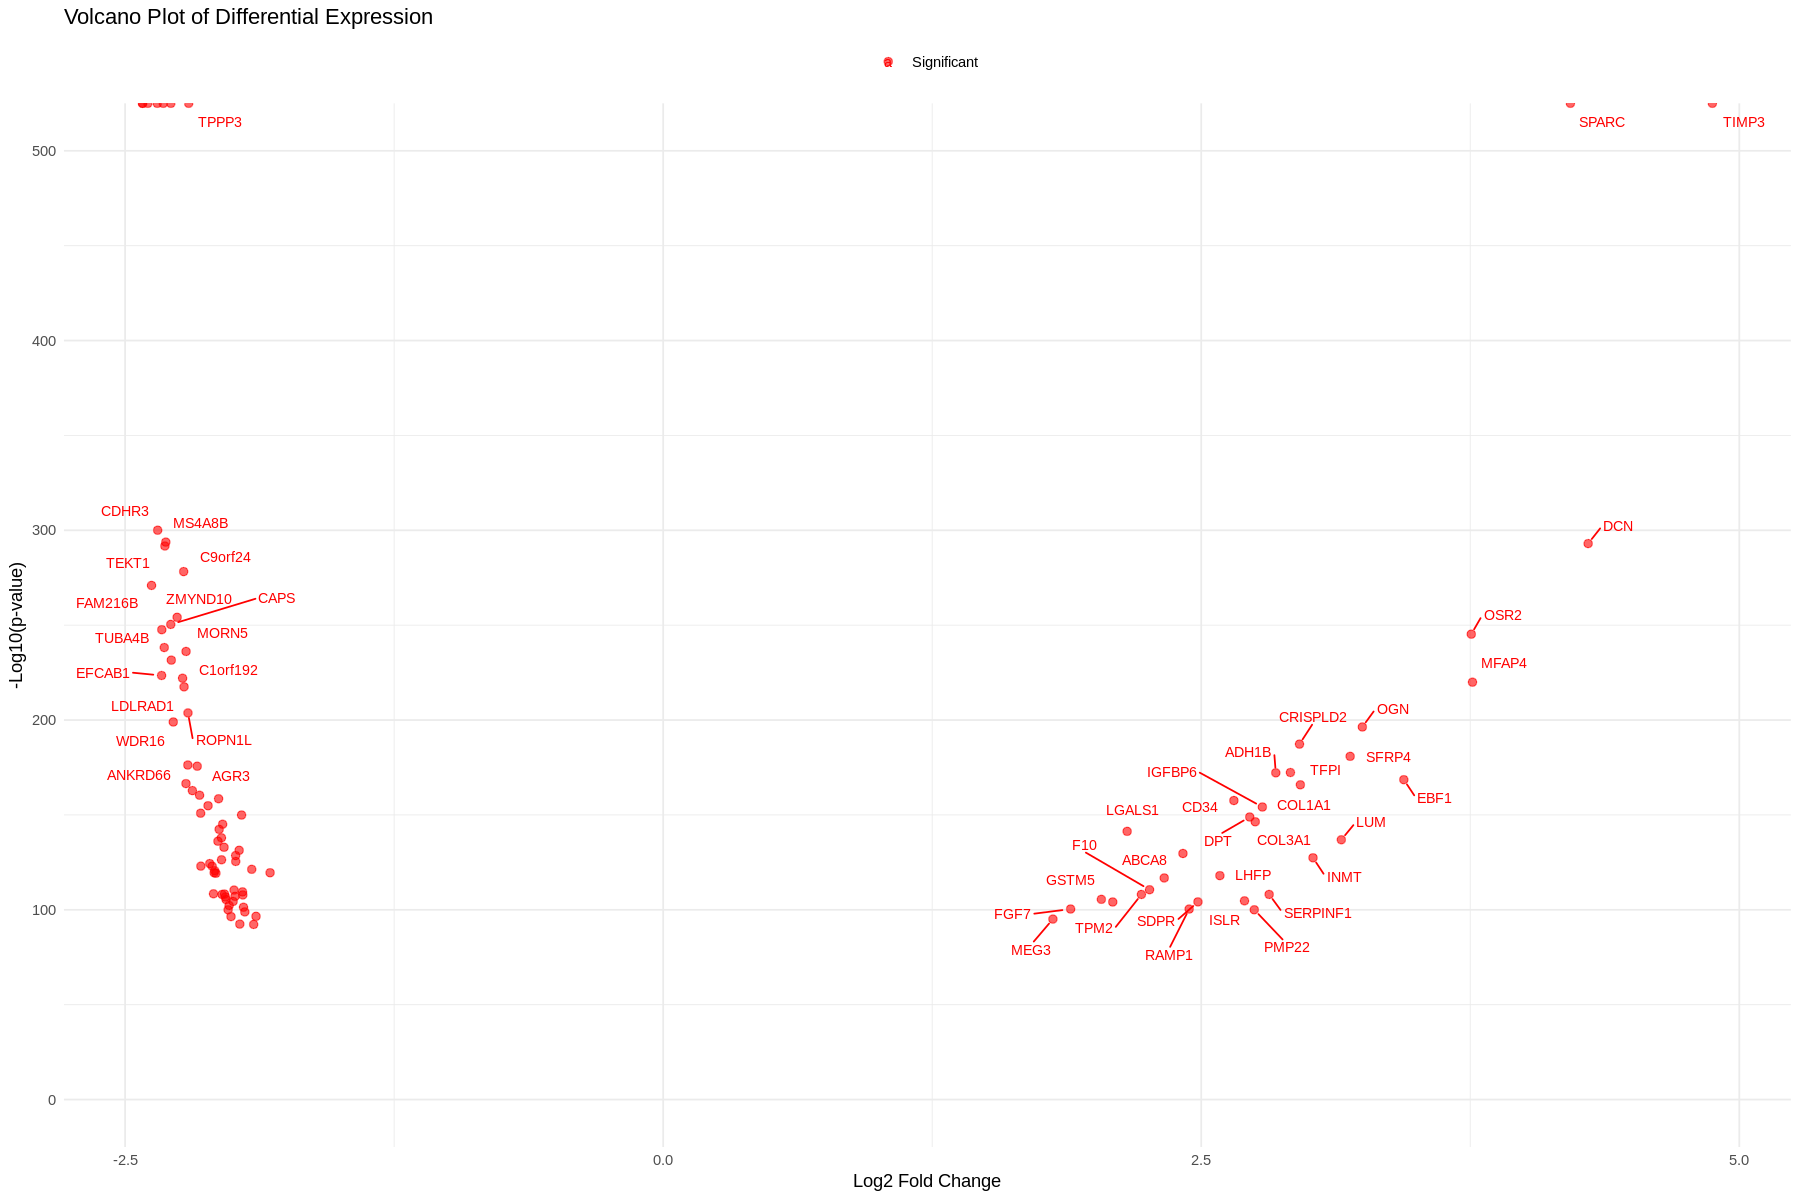

In [ ]:
volcanoplotlabelled <- volcanoplot +
  geom_text_repel(aes(label = ifelse(significance == "Significant", rownames(top_genes_df), "")),
                                                       box.padding = 0.5, point.padding = 0.5,
                                                       max.overlaps = 10, size = 3)
volcanoplotlabelled

##**Gene Set Enrichment Analysis**
* We can get more information about what biological processes or pathways each cell type might be enriched for using gene set enrichment analysis
* This will use a package WebGestaltR

**1. Import the list of ranked genes from cell types we generated using Scanpy yesterday**

In [ ]:
rankedgenes <- read.csv("/content/celltypemarkergenes.csv")
head(rankedgenes)
colnames(rankedgenes) <- c('Secretory Epithelial-1_n','Secretory Epithelial-1_s',
        'Secretory Epithelial-2_n', 'Secretory Epithelial-2_s',
        'Secretory Epithelial-2_n', 'Secretory Epithelial-2_s',
        'Ciliated Epithelial_n', 'Ciliated Epithelial_s',
        'High grade Carcinoma_n',  'High grade Carcinoma_s',
        'STIC lesion_n','STIC lesion_s',
        'Immune_n', 'Immune_s',
        'Fibroblast_n','Fibroblast_s',
        'STIC lesion_n', 'STIC lesion_s')

head(rankedgenes)
character_columns <- rankedgenes[sapply(rankedgenes, is.character)]
head(character_columns)

Warning message in file(file, "rt"):
“cannot open file '/content/celltypemarkergenes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
rankedgenes <- read.csv("/content/diseasestagemarkergenes.csv")
head(rankedgenes)
colnames(rankedgenes) <- c('Benign_n','Benign_s',
        'I_n', 'I_s',
        'IIIc_n', 'IIIc_s',
        'IIIc1_n', 'IIIc1_s',
        'IV_n',  'IV_s')

head(rankedgenes)
#character_columns <- rankedgenes[sapply(rankedgenes, is.character)]
# head(character_columns)

,Benign_n,Benign_s,I_n,I_s,IIIc_n,IIIc_s,IIIc1_n,IIIc1_s,IV_n,IV_s
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,PPP1CB,39.33744,MTRNR2L1,27.95792,FLI1,31.01986,FLI1,30.07684,PTPRS,32.33544
2,TNFSF13B,37.87919,HLA-B,26.94250,RPL41,29.93790,RPL9,25.20897,SET,29.56412
3,CLDN11,35.35380,HLA-DRB1,24.64404,RPL35A,29.22734,KRT8,24.75470,WTAP,27.46283
4,MORC2-AS1,32.68883,HLA-A,24.37888,RPL37,29.02659,HFE2,23.53634,HNRNPH1,26.04484
5,SLC40A1,29.81350,HLA-L,23.37393,RPL37A,28.85116,ACTB,22.83471,C1orf63,25.70123
6,MALAT1,26.33461,B2M,23.07137,FAU,28.21706,RPS28,22.10594,TSPYL1,25.06751


,Benign_n,Benign_s,I_n,I_s,IIIc_n,IIIc_s,IIIc1_n,IIIc1_s,IV_n,IV_s
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,PPP1CB,39.33744,MTRNR2L1,27.95792,FLI1,31.01986,FLI1,30.07684,PTPRS,32.33544
2,TNFSF13B,37.87919,HLA-B,26.94250,RPL41,29.93790,RPL9,25.20897,SET,29.56412
3,CLDN11,35.35380,HLA-DRB1,24.64404,RPL35A,29.22734,KRT8,24.75470,WTAP,27.46283
4,MORC2-AS1,32.68883,HLA-A,24.37888,RPL37,29.02659,HFE2,23.53634,HNRNPH1,26.04484
5,SLC40A1,29.81350,HLA-L,23.37393,RPL37A,28.85116,ACTB,22.83471,C1orf63,25.70123
6,MALAT1,26.33461,B2M,23.07137,FAU,28.21706,RPS28,22.10594,TSPYL1,25.06751


**2. We will look at Secretory Epithelial-1, Secretory Epithelial-2 and STIC lesion cell clusters**
* Create  subsets of gene files for each cell type



In [ ]:
Benign <- rankedgenes[, colnames(rankedgenes) %in% c('Benign_n', 'Benign_s'), drop = FALSE]
stageI <- rankedgenes[, colnames(rankedgenes) %in% c('I_n', 'I_s'), drop = FALSE]
stageIIIc <- rankedgenes[, colnames(rankedgenes) %in% c('IIIc_n', 'IIIc_s'), drop = FALSE]
stageIIIc1 <- rankedgenes[, colnames(rankedgenes) %in% c('IIIc1_n', 'IIIc1_s'), drop = FALSE]
stageIV <- rankedgenes[, colnames(rankedgenes) %in% c('IV_n', 'IV_s'), drop = FALSE]

head(Benign)
head(stageI)
head(stageIIIc)
head(stageIIIc1)
head(stageIV)

,Benign_n,Benign_s
,<chr>,<dbl>
1,PPP1CB,39.33744
2,TNFSF13B,37.87919
3,CLDN11,35.35380
4,MORC2-AS1,32.68883
5,SLC40A1,29.81350
6,MALAT1,26.33461


,I_n,I_s
,<chr>,<dbl>
1,MTRNR2L1,27.95792
2,HLA-B,26.94250
3,HLA-DRB1,24.64404
4,HLA-A,24.37888
5,HLA-L,23.37393
6,B2M,23.07137


,IIIc_n,IIIc_s
,<chr>,<dbl>
1,FLI1,31.01986
2,RPL41,29.93790
3,RPL35A,29.22734
4,RPL37,29.02659
5,RPL37A,28.85116
6,FAU,28.21706


,IIIc1_n,IIIc1_s
,<chr>,<dbl>
1,FLI1,30.07684
2,RPL9,25.20897
3,KRT8,24.75470
4,HFE2,23.53634
5,ACTB,22.83471
6,RPS28,22.10594


,IV_n,IV_s
,<chr>,<dbl>
1,PTPRS,32.33544
2,SET,29.56412
3,WTAP,27.46283
4,HNRNPH1,26.04484
5,C1orf63,25.70123
6,TSPYL1,25.06751


**3. Save as rank files for input to webgestalt**

In [ ]:
write.table(Benign, file = "/content/Benignrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(stageI, file = "/content/stageIrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(stageIIIc, file = "/content/stageIIIcrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(stageIIIc1, file = "/content/stageIIIc1rankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(stageIV, file = "/content/stageIVrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

**4. Run Webgestalt GSEA for each rank file**

In [ ]:
BenignResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/Benignrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

stageIResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/stageIrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

stageIIIcResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/stageIIIcrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

stageIIIc1Result <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/stageIIIc1rankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

stageIVResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/stageIVrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00290
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00471
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00780
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00785
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score has more than 500 items in set hsa01100
”


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1737970856!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00290
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00471
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00780
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00785
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score has more than 500 items in set hsa01100
”


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the /content/Project_1737971565!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00290
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00471
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00780
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00785
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score has more than 500 items in set hsa01100
”


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1737972281!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00290
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00471
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00780
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00785
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score has more than 500 items in set hsa01100
”


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1737973000!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00290
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00471
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00780
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00785
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score has more than 500 items in set hsa01100
”


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1737973720!


Try different databases, use listGeneSet() to view the databases available

In [ ]:
#listGeneSet()

**5. To plot a dotplot of all the results combined**
* Add a column to each result table identify cell type
* Join the results tables together

In [ ]:
BenignResult$Celltype = 'Benign'
stageIResult$Celltype = 'stageI'
stageIIIcResult$Celltype = 'stageIIIc'
stageIIIc1Result$Celltype = 'stageIIIc1'
stageIVResult$Celltype = 'stageIV'
gsea<- BenignResult %>% bind_rows(stageIResult) %>% bind_rows(stageIIIcResult) %>% bind_rows(stageIIIc1Result) %>% bind_rows(stageIVResult) %>%
  filter(FDR < 0.1) %>% filter(pValue < 0.05 )
gsea



geneSet,description,link,enrichmentScore,normalizedEnrichmentScore,pValue,FDR,size,plotPath,leadingEdgeNum,leadingEdgeId,userId,Celltype
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
hsa03010,Ribosome,http://www.kegg.jp/kegg-bin/show_pathway?hsa03010+9553+6139+23521+6146+6202+3921+6189+6128+6124+6191+6130+4736+6170+6187+9045+6201+6194+6134+6147+6158+6132+6228+6166+6188+6229+6159+6175+6125+6160+6137+6122+6230+6224+6133+6205+6157+6203+6154+6207+6136+6142+7311+6206+6193+6135+6141+6222+6210+6155+6143+6161+6171+6152+6209+11224+6156+6208+9349+6169+6232+6233+6164+6227+6223+6234+6176+6181+6217+6167+6165+6168+25873+6235+2197,-0.8288436,-1.714022,0.000000000,0.0000000000,130,./Project_1737970856_GSEA/hsa03010.png,74,9553;6139;23521;6146;6202;3921;6189;6128;6124;6191;6130;4736;6170;6187;9045;6201;6194;6134;6147;6158;6132;6228;6166;6188;6229;6159;6175;6125;6160;6137;6122;6230;6224;6133;6205;6157;6203;6154;6207;6136;6142;7311;6206;6193;6135;6141;6222;6210;6155;6143;6161;6171;6152;6209;11224;6156;6208;9349;6169;6232;6233;6164;6227;6223;6234;6176;6181;6217;6167;6165;6168;25873;6235;2197,FAU;MRPL33;RPL10;RPL10A;RPL11;RPL12;RPL13;RPL13A;RPL14;RPL17;RPL18;RPL18A;RPL19;RPL22;RPL23;RPL23A;RPL24;RPL26;RPL27;RPL27A;RPL28;RPL29;RPL3;RPL30;RPL31;RPL32;RPL34;RPL35;RPL35A;RPL36;RPL36AL;RPL37;RPL37A;RPL38;RPL39;RPL4;RPL41;RPL5;RPL6;RPL7A;RPL8;RPL9;RPLP0;RPLP1;RPLP2;RPS11;RPS12;RPS13;RPS14;RPS15;RPS15A;RPS16;RPS18;RPS19;RPS2;RPS20;RPS21;RPS23;RPS24;RPS25;RPS27;RPS27A;RPS28;RPS29;RPS3;RPS3A;RPS4X;RPS5;RPS6;RPS7;RPS8;RPS9;RPSA;UBA52,Benign
hsa03050,Proteasome,http://www.kegg.jp/kegg-bin/show_pathway?hsa03050+5699+5685+5706+5693+5686+23198+5701+5691+5702+5684+5682+5700+5696+5705+5714+9491+5692+9861+5719+10197+5683+10213+51371+5687+5689+5688+5707+5709+5690+5721+5694+5704+5695+5708+5720+11047+5718+5717,-0.8180421,-1.624267,0.000000000,0.0004977733,43,./Project_1737970856_GSEA/hsa03050.png,38,5699;5685;5706;5693;5686;23198;5701;5691;5702;5684;5682;5700;5696;5705;5714;9491;5692;9861;5719;10197;5683;10213;51371;5687;5689;5688;5707;5709;5690;5721;5694;5704;5695;5708;5720;11047;5718;5717,ADRM1;POMP;PSMA1;PSMA2;PSMA3;PSMA4;PSMA5;PSMA6;PSMA7;PSMB1;PSMB10;PSMB2;PSMB3;PSMB4;PSMB5;PSMB6;PSMB7;PSMB8;PSMC1;PSMC2;PSMC3;PSMC4;PSMC5;PSMC6;PSMD1;PSMD11;PSMD12;PSMD13;PSMD14;PSMD2;PSMD3;PSMD6;PSMD8;PSME1;PSME2;PSME3;PSME4;PSMF1,Benign
hsa05320,Autoimmune thyroid disease,http://www.kegg.jp/kegg-bin/show_pathway?hsa05320+3107+3109+3111+3118+3117+355+3122+958+3127+3108+3106+3113+3119+3105+3115+3123,-0.7699671,-1.544898,0.000000000,0.0041481107,39,./Project_1737970856_GSEA/hsa05320.png,16,3107;3109;3111;3118;3117;355;3122;958;3127;3108;3106;3113;3119;3105;3115;3123,CD40;FAS;HLA-A;HLA-B;HLA-C;HLA-DMA;HLA-DMB;HLA-DOA;HLA-DPA1;HLA-DPB1;HLA-DQA1;HLA-DQA2;HLA-DQB1;HLA-DRA;HLA-DRB1;HLA-DRB5,Benign
hsa05310,Asthma,http://www.kegg.jp/kegg-bin/show_pathway?hsa05310+3109+3111+3118+3117+7124+3122+958+3127+3108+3113+3119+3115+3123,-0.8101383,-1.559996,0.000000000,0.0042310729,25,./Project_1737970856_GSEA/hsa05310.png,13,3109;3111;3118;3117;7124;3122;958;3127;3108;3113;3119;3115;3123,CD40;HLA-DMA;HLA-DMB;HLA-DOA;HLA-DPA1;HLA-DPB1;HLA-DQA1;HLA-DQA2;HLA-DQB1;HLA-DRA;HLA-DRB1;HLA-DRB5;TNF,Benign
hsa05330,Allograft rejection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05330+3107+3109+3111+3118+3117+355+7124+3122+958+3127+3108+3106+3113+3119+3105+3115+3123,-0.7737512,-1.536052,0.000000000,0.0042666281,34,./Project_1737970856_GSEA/hsa05330.png,17,3107;3109;3111;3118;3117;355;7124;3122;958;3127;3108;3106;3113;3119;3105;3115;3123,CD40;FAS;HLA-A;HLA-B;HLA-C;HLA-DMA;HLA-DMB;HLA-DOA;HLA-DPA1;HLA-DPB1;HLA-DQA1;HLA-DQA2;HLA-DQB1;HLA-DRA;HLA-DRB1;HLA-DRB5;TNF,Benign
hsa05130,Pathogenic Escherichia coli infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05130+10095+2017+10109+10381+10552+7277+9475+1499+8976+387+10092+3688+999+998+7534+81873+84617+100506658+7280+203068+10383+9076+4691+7430+10376+3875+84790+60+71,-0.7711509,-1.545835,0.000000000,0.0047786235,55,./Project_1737

**6. Plot the dot plot**

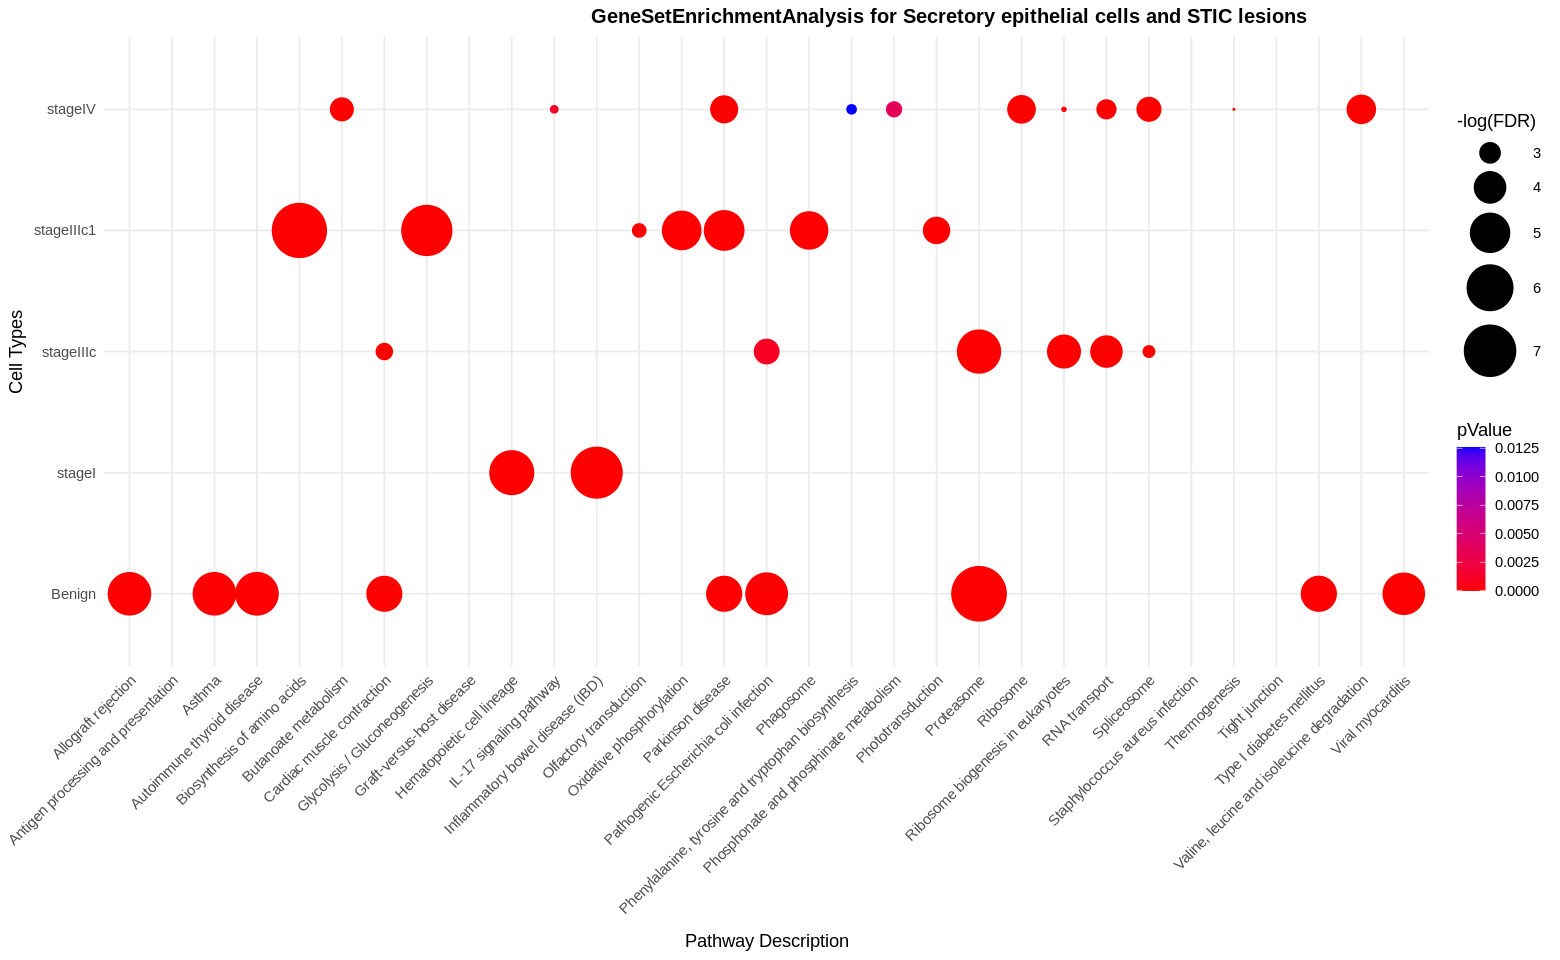

In [ ]:
options(repr.plot.width = 13, repr.plot.height =8)

ggplot(gsea, aes(x = description, y = Celltype)) +
  geom_point(aes(size= -log(FDR), color = pValue)) +
  scale_color_gradient(low = "red", high = "blue", name = "pValue") +
  scale_size_continuous(range = c(0.2, 15)) +
  theme_minimal() +
  labs(
    title = "GeneSetEnrichmentAnalysis for different disease stages ",
    x = "Pathway Description",
    y = "Cell Types"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 12, face = "bold", hjust = 0.8))

##**Linear regression**
* We can assess correlations in gene expression between 2 genes in one or two cell types

**1. Subset the data to secretory epithelial-1 and secretory epithelial-2 again**



In [ ]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

**2. Create a new column in the metadata with JUNB and IER2 expression for each cell**

In [ ]:
metadata$HSPB8<-exp_data[row.names(exp_data),"HSPB8"]
metadata$MAFF<-exp_data[row.names(exp_data),"MAFF"]
metadata$HMGA1<-exp_data[row.names(exp_data),"HMGA1"]
# 'CDKN2B', 'FRY', 'FGFR2'

# HSPB8 and MAFF.
head(metadata)

,CellID,Patient,Author,Tissue,Disease_stage,Age,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,Celltype,HSPB8,MAFF,HMGA1
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,sc_b1_A08,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1326,1326,142098,24.09182,36.65006,55.25201,86.71480,0,Secretory Epithelial-1,-0.7250024,-0.9581188,-0.6728489
2,sc_b1_B06,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1599,1599,273240,25.74294,34.62194,47.67201,74.23291,0,Secretory Epithelial-1,-0.7250024,1.0737172,0.5509544
3,sc_b1_B08,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2298,2298,193108,24.94614,32.24620,42.47468,62.87777,1,Secretory Epithelial-2,-0.7250024,0.1364790,-0.6728489
4,sc_b1_B11,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2100,2100,195696,20.84202,29.20755,41.62834,66.75303,0,Secretory Epithelial-1,-0.7250024,-0.7910486,0.1661192
5,sc_b1_C15,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1793,1793,279434,19.77569,27.73965,39.91712,66.52304,1,Secretory Epithelial-2,-0.7250024,-0.9581188,-0.6728489
6,sc_b1_C18,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1335,1335,328526,27.70253,36.29728,49.93090,78.92983,0,Secretory Epithelial-1,-0.7250024,-0.1602735,0.7241553


**3. Subset the secretory metadata to contain only cells with JUNB and IER2 expression equal to or greater than 0**

In [ ]:
filtered_meta <- metadata %>%
  filter(MAFF >= 0 & HMGA1 >= 0)


**4. Run the linear regression model**

In [ ]:
model <- lm(MAFF ~ HMGA1, data = metadata)
summary(model)

ERROR: Error in eval(mf, parent.frame()): object 'metadata' not found


**5.Create a scatter plot of JUNB expression vs IER2 expression**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


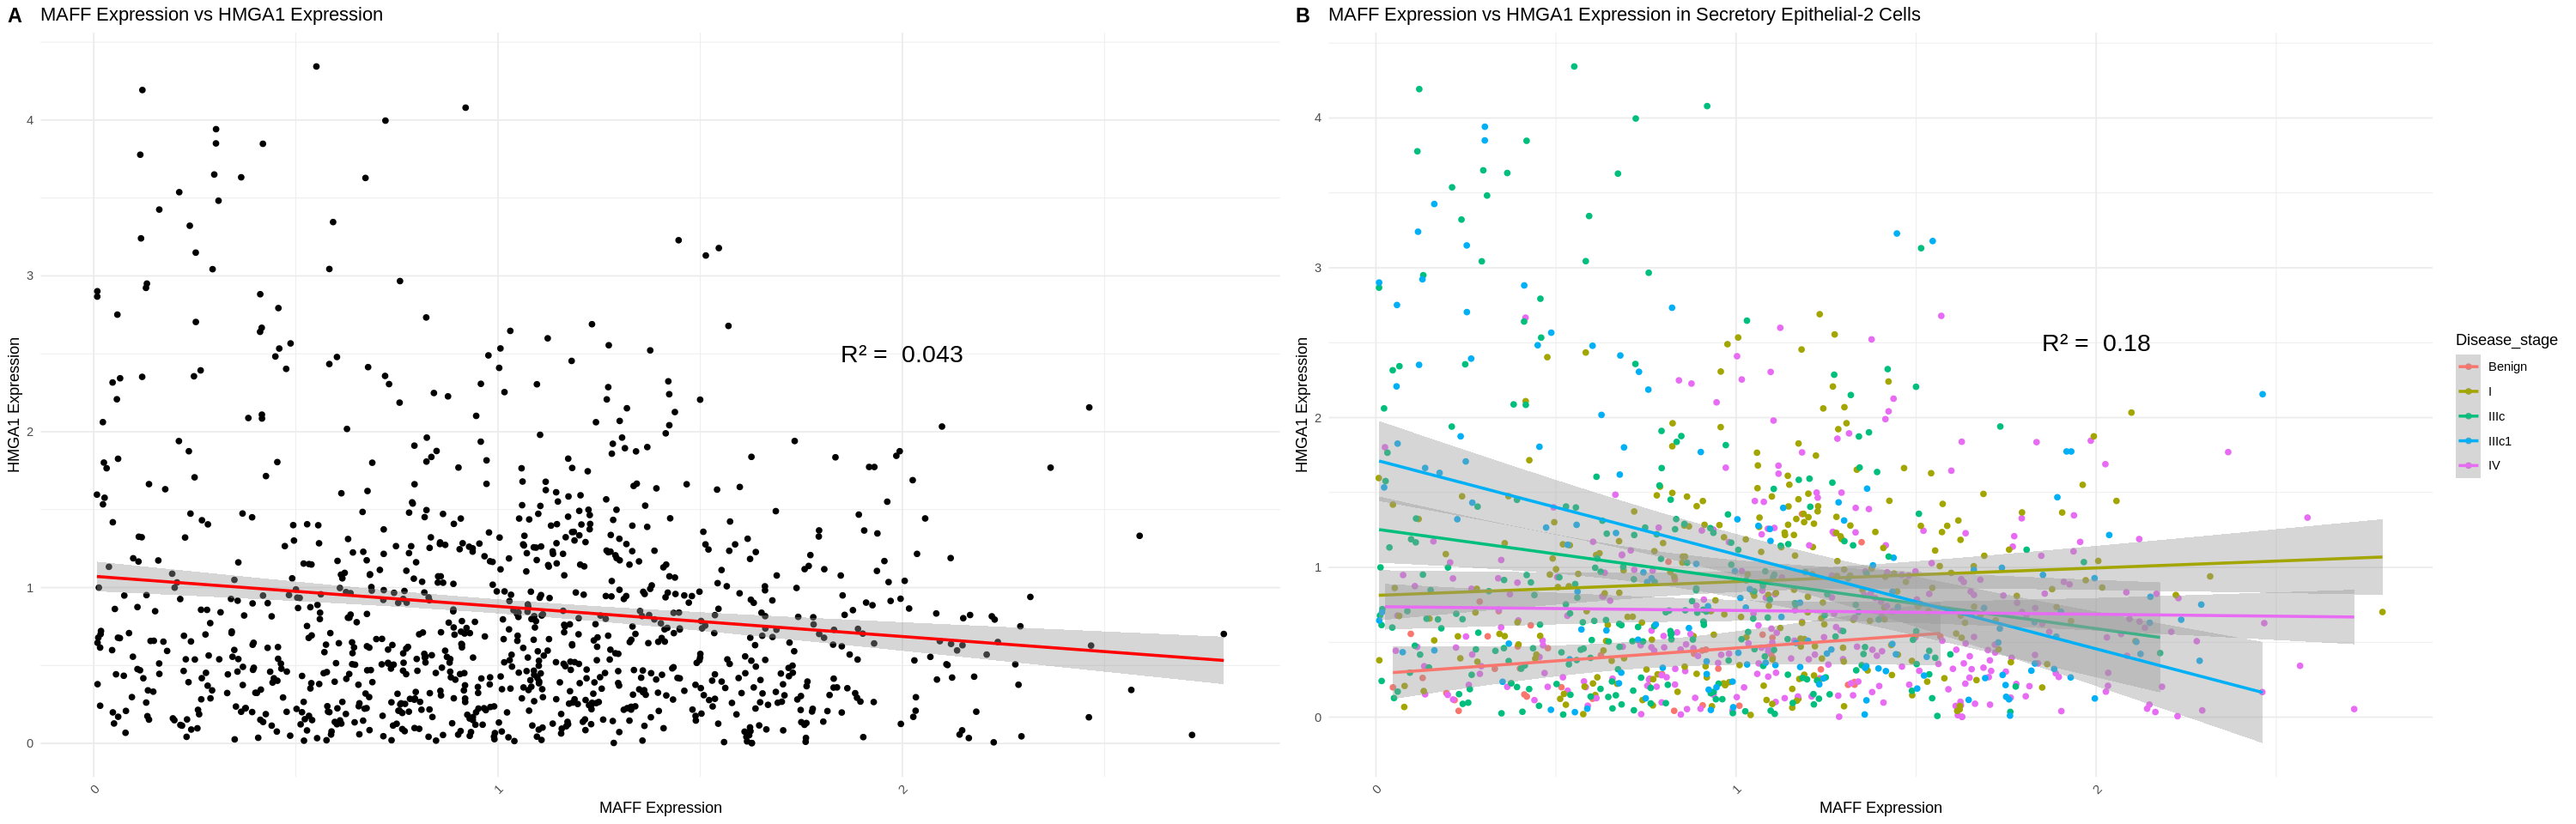

In [ ]:
options(repr.plot.width = 25, repr.plot.height =8)
model <- lm(MAFF ~ HMGA1, data = metadata)
r_squared_all <- summary(model)$r.squared

stageIIIcmeta<- subset(metadata, metadata$Disease_stage %in%c('IIIc1'))
model_stageIIIc <- lm(MAFF~ HMGA1, data = stageIIIcmeta)
r_squared_IIIc <- summary(model_stageIIIc)$r.squared

geneexpression <- ggplot(filtered_meta, aes(x = MAFF, y = HMGA1)) +
                geom_point() +
                geom_smooth(method = "lm", color = "red", se = TRUE) +
                theme_minimal() +
                labs(title = "MAFF Expression vs HMGA1 Expression",
                x = "MAFF Expression",
                y = "HMGA1 Expression") +
                theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
                annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared_all,3)), size=6)

stagegeneexpression<- ggplot(filtered_meta, aes(x = MAFF, y = HMGA1)) +
                geom_point(aes(color=Disease_stage)) +
                theme_minimal() +
                labs(title = "MAFF Expression vs HMGA1 Expression in Secretory Epithelial-2 Cells ",
                x = "MAFF Expression",
                y = "HMGA1 Expression") +
                theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
                annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared_IIIc,3)), size=6) +
   geom_smooth(data=subset(filtered_meta,
               Disease_stage == "I" | Disease_stage == "IIIc" | Disease_stage == "IIIc1" | Disease_stage == "IV" |Disease_stage =="Benign" ),
              aes(x = MAFF, y = HMGA1, color=factor(Disease_stage)), method = "lm", se = TRUE)


cowplot::plot_grid(geneexpression, stagegeneexpression, labels = "AUTO")


**6. Add the Rsquared value onto the plot**

`geom_smooth()` using formula = 'y ~ x'


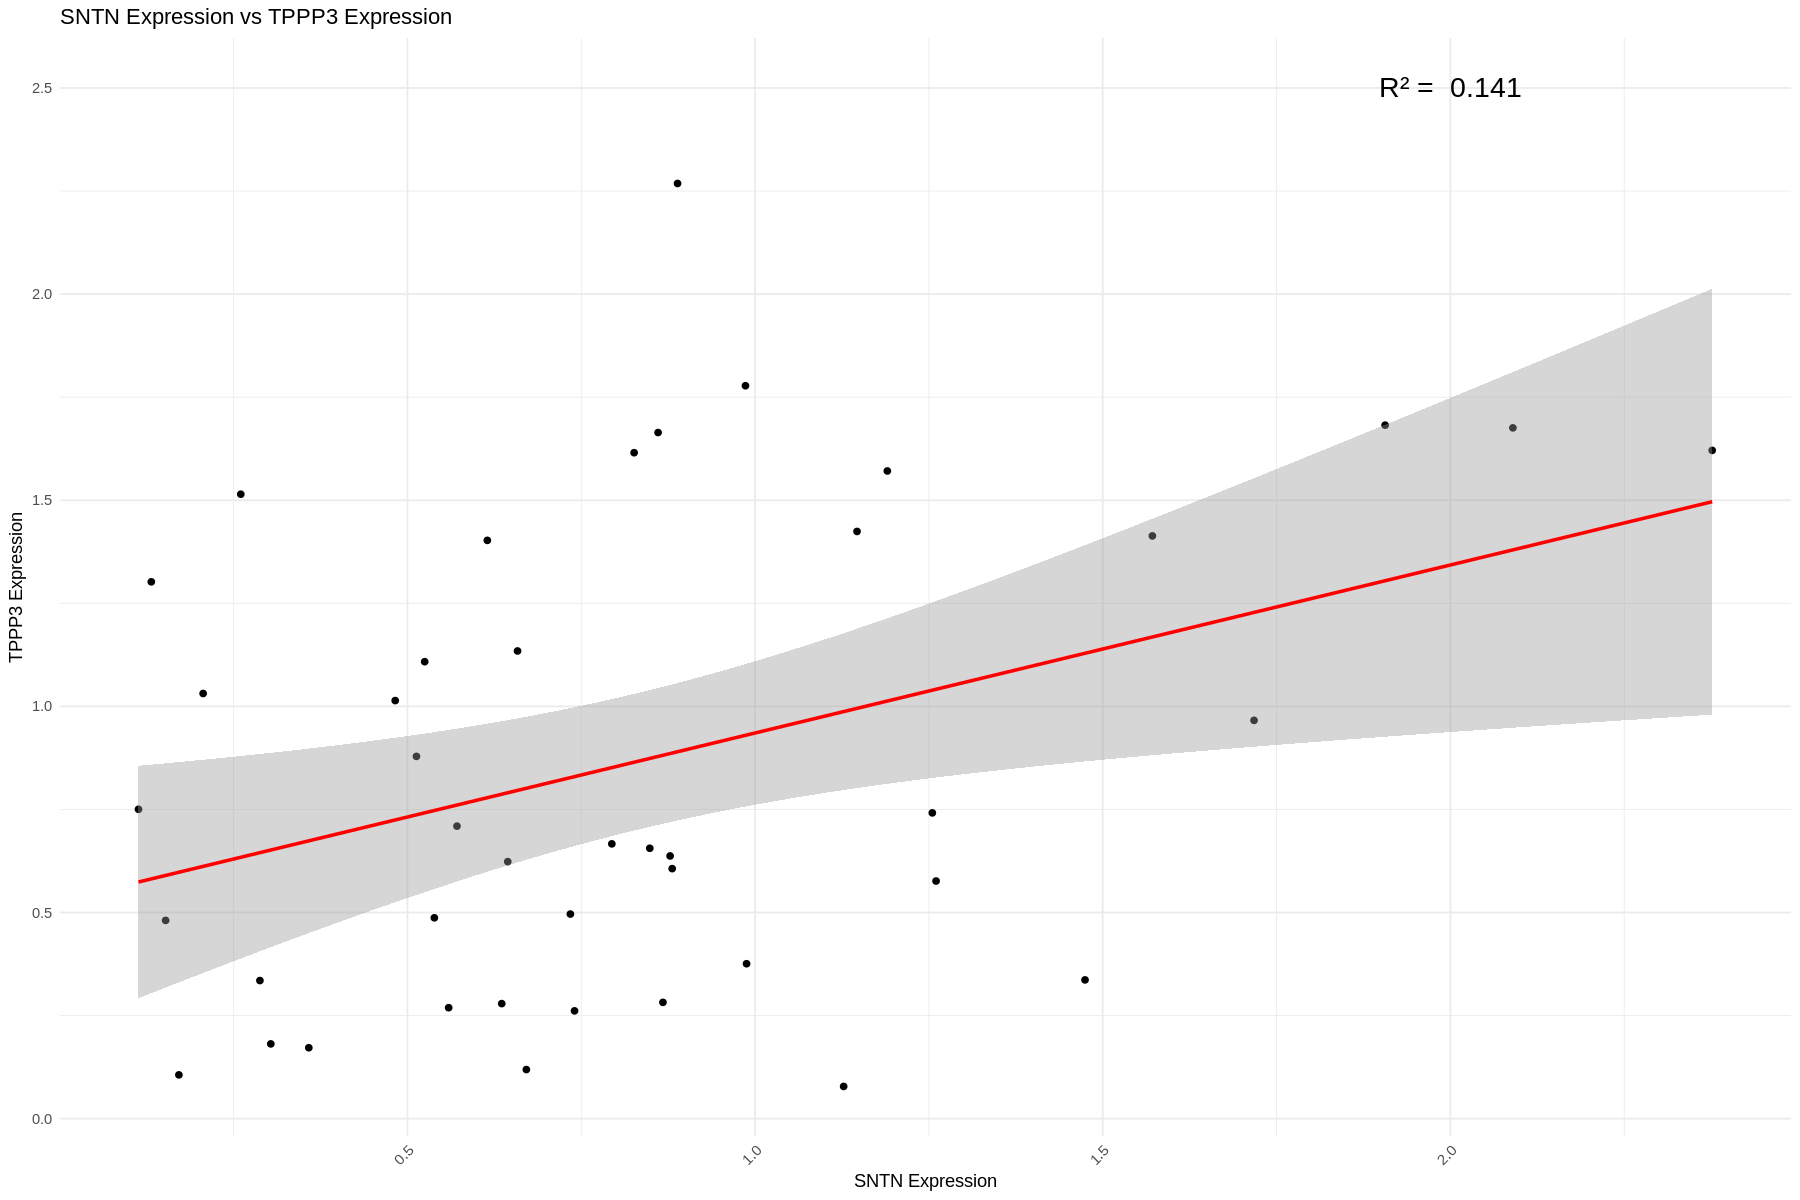

In [ ]:
r_squared <- summary(model)$r.squared

geneexpression<- geneexpression + annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared,3)), size=6)
geneexpression


**7.Colour the points by disease stage or tissue type**


In [ ]:
options(repr.plot.width = 15, repr.plot.height =10)
stagegeneexpression<- ggplot(filtered_meta, aes(x = MAFF, y = JUNB)) +
                geom_point(aes(color=Disease_stage)) +
                theme_minimal() +
                labs(title = "MAFFExpression vs JUNB Expression",
                x = "MAFFExpression",
                y = "JUNB Expression") +
                theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
                annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared,3)), size=6) +
   geom_smooth(data=subset(filtered_meta,Disease_stage == "IV" | Disease_stage == "I" | Disease_stage == "IIIc" | Disease_stage == "IIIc1" | Disease_stage =="Benign" ), aes(x = MAFF, y = JUNB, color=factor(Disease_stage)), method = "lm", se = TRUE)
stagegeneexpression

# tissuegeneexpression<- geneexpression + geom_point(aes(color=Tissue))
# tissuegeneexpression

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'MAFF' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .  

##**Correlate several genes against eachother using a correlation matrix**

**1. Remove values with a standard deviation of 0, as this will break the correlation matrix**

In [ ]:
exp_data<- exp_data[,apply(exp_data,2, sd) > 0]

In [ ]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)


secretoryexp<- secretoryexp[,apply(secretoryexp,2, sd) > 0]

**2. Correlate genes against eachother**

In [ ]:
cordata<-cor(exp_data[colnames(exp_data)],
             exp_data[colnames(exp_data)])

In [ ]:
?cor()

In [ ]:
cordata<-cor(secretoryexp[colnames(secretoryexp)],
             secretoryexp[colnames(secretoryexp)])

**3. Plot a heatmap of the correlation matrix of genes with a correlation score of >0.6**
* Define the genes with a correlation score of >0.6
* Subset the correlation matrix to these genes only
* Plot as a heatmap

In [ ]:
upper_tri <- upper.tri(cordata)
high_corr<-which(upper_tri & abs(cordata)>0.6, arr.ind=TRUE)

# here only positive correlations are shown
# adding abs(cordata) would include negative

corrplot <- cordata[rownames(cordata) %in% rownames(high_corr),]
corrplot <- corrplot[,colnames(corrplot) %in% rownames(high_corr)]

corrplot


,CD84,LY9,FMO3,NFASC,PROX1,MS4A4A,SLCO2B1,CD3G,CLEC7A,CLEC14A,⋯,CD93,CCDC37,TMEM212,MMRN1,LOC731424,DOCK2,IRF4,HLA-DRB5,MYCT1,GIMAP7
CD84,1.0000000000,-0.0006459755,-0.0006897881,-0.0006459755,-0.0008784982,-0.0006816619,-0.0007117793,-0.0008654451,-0.0009886210,-0.0009071311,⋯,-0.001050921,-0.001252269,-0.001049294,-0.0007706237,-0.001019518,-0.0006459755,-0.001105404,0.002566518,-0.0009938274,-0.0006459755
LY9,-0.0006459755,1.0000000000,-0.0006620112,-0.0006199628,0.9449563443,-0.0006542122,-0.0006831168,-0.0008305946,-0.0009488103,-0.0008706019,⋯,-0.001008602,-0.001201841,-0.001007040,-0.0007395916,-0.000978463,-0.0006199628,-0.001060890,-0.037014453,0.4303623998,-0.0006199628
FMO3,-0.0006897881,-0.0006620112,1.0000000000,-0.0006620112,-0.0009003059,-0.0006985835,-0.0007294485,-0.0008869288,-0.0010131624,-0.0009296496,⋯,-0.001077009,-0.001283355,-0.001075341,-0.0007897536,-0.001044826,-0.0006620112,-0.001132844,-0.033955482,-0.0010184981,-0.0006620112
NFASC,-0.0006459755,-0.0006199628,-0.0006620112,1.0000000000,-0.0008431220,-0.0006542122,-0.0006831168,-0.0008305946,-0.0009488103,-0.0008706019,⋯,-0.001008602,-0.001201841,-0.001007040,-0.0007395916,-0.000978463,-0.0006199628,-0.001060890,0.065489831,-0.0009538071,-0.0006199628
PROX1,-0.0008784982,0.9449563443,-0.0009003059,-0.0008431220,1.0000000000,-0.0008896997,-0.0009290086,-0.0011295720,-0.0012903401,-0.0011839802,⋯,-0.001371654,-0.001634451,-0.001369529,-0.0010058119,-0.001330666,-0.0008431220,-0.001442764,-0.021619416,0.4063887527,-0.0008431220
MS4A4A,-0.0006816619,-0.0006542122,-0.0006985835,-0.0006542122,-0.0008896997,1.0000000000,-0.0007208550,-0.0008764802,-0.0010012266,-0.0009186977,⋯,-0.001064321,-0.001268236,-0.001062673,-0.0007804497,-0.001032517,-0.0006542122,-0.001119498,-0.013025727,-0.0010064994,-0.0006542122
SLCO2B1,-0.0007117793,-0.0006831168,-0.0007294485,-0.0006831168,-0.0009290086,-0.0007208550,1.0000000000,-0.0009152051,-0.0010454631,0.9121943454,⋯,0.313954350,-0.001324270,-0.001109624,-0.0008149318,-0.001078136,-0.0006831168,-0.001168960,0.025366654,0.8890165324,0.9941934940
CD3G,-0.0008654451,-0.0008305946,-0.0008869288,-0.0008305946,-0.0011295720,-0.0008764802,-0.0009152051,1.0000000000,-0.0012711677,0.0478870982,⋯,-0.001351273,-0.001610166,-0.001349180,-0.0009908671,-0.001310895,-0.0008305946,-0.001421327,-0.008919635,-0.0012778621,-0.0008305946
CLEC7A,-0.0009886210,-0.0009488103,-0.0010131624,-0.0009488103,-0.0012903401,-0.0010012266,-0.0010454631,-0.0012711677,1.0000000000,-0.0013323962,⋯,-0.001543595,-0.001839335,-0.001541205,-0.0011318939,-0.001497470,-0.0009488103,-0.001623619,0.018665631,-0.0014597359,-0.0009488103
CLEC14A,-0.0009071311,-0.0008706019,-0.0009296496,-0.0008706019,-0.0011839802,-0.0009186977,0.9121943454,0.0478870982,-0.0013323962,1.0000000000,⋯,0.289438076,-0.001687723,-0.001414167,-0.0010385943,-0.001374037,-0.0008706019,-0.001489788,0.039874833,0.8203307497,0.9175546024


In [ ]:
make_heatmap <- exp_data
colnames(make_heatmap)<-var_data$Gene
make_heatmap$Celltype <- metadata$Celltype
make_heatmap$Disease_stage <- metadata$Disease_stage
make_heatmap$CellID <- metadata$CellID

colnames(make_heatmap)
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-2'))
heatmap_sec<- subset(make_heatmap, make_heatmap$CellID %in% secretorymeta$CellID)

genes_of_interest <- append(append(append(append(Benign$Benign_n[1:25], stageI$I_n[1:25]),stageIIIc$IIIc_n[1:25]),stageIIIc1$IIIc1_n[1:25]),stageIV$IV_n[1:25])

genes_of_interest %in% colnames(make_heatmap)

# also want NEK10, CDKN2B, FGFR2, SH2B3, BRCA2, FRY

make_heatmap <- heatmap_sec[,colnames(heatmap_sec) %in% c(character_columns$`Ciliated Epithelial_n`[1:15],
 character_columns$`High grade Carcinoma_n`[1:15], character_columns$`Secretory Epithelial-1_n`[1:15],
 character_columns$`Secretory Epithelial-2_n.1`[1:15], character_columns$`Secretory Epithelial-2_n`[1:15],
 character_columns$`STIC lesion_n.1`[1:15], character_columns$`STIC lesion_n`[1:15],
 character_columns$Fibroblast_n[1:15],character_columns$Immune_n[1:15]) | colnames(heatmap_sec) %in% c("Celltype", "Disease_stage", "CellID", "NEK10", "CDKN2B", "FGFR2", "SH2B3", "BRCA2", "FRY")]

nrow(make_heatmap)
head(make_heatmap)
genes_of_interest
# heatmap(cordata,main="Correlation of gene expression across Secretory Epithelial-2 Cells", xlab= "Gene")

[1] "PLEKHN1"        "C1orf159"       "B3GALT6"        "FAM132A"       
   [5] "SCNN1D"         "PUSL1"          "MXRA8"          "LOC148413"     
   [9] "CDK11B"         "LOC100129534"   "PANK4"          "ARHGEF16"      
  [13] "MEGF6"          "WRAP73"         "TP73"           "CEP104"        
  [17] "DFFB"           "NPHP4"          "RNF207"         "ICMT"          
  [21] "ACOT7"          "TNFRSF25"       "NOL9"           "ZBTB48"        
  [25] "KLHL21"         "PHF13"          "THAP3"          "PER3"          
  [29] "TNFRSF9"        "SLC2A5"         "PIK3CD"         "NMNAT1"        
  [33] "UBE4B"          "SRM"            "MTOR"           "MTHFR"         
  [37] "CLCN6"          "NPPB"           "PLOD1"          "TNFRSF1B"      
  [41] "PDPN"           "KAZN"           "FHAD1"          "CASP9"         
  [45] "PLEKHM2"        "SLC25A34"       "ZBTB17"         "ARHGEF19"      
  [49] "FBXO42"         "CROCCP3"        "CROCCP2"        "CROCC"         
  [53] "ATP13A2"        "PADI2"          "ARHGEF10L"      "IGSF21"        
  [57] "KLHDC7A"        "ALDH4A1"        "PQLC2"          "TMCO4"         
  [61] "OTUD3"          "PLA2G2A"        "UBXN10"         "MUL1"          
  [65] "CDA"            "PINK1"          "KIF17"          "ECE1"          
  [69] "ALPL"           "HSPG2"          "ZBTB40"         "C1QA"          
  [73] "C1QC"           "C1QB"           "LUZP1"          "ZNF436"        
  [77] "C1orf213"       "ASAP3"          "FUCA1"          "MYOM3"         
  [81] "IL22RA1"        "GRHL3"          "STPG1"          "RCAN3"         
  [85] "NCMAP"          "RUNX3"          "TMEM57"         "LDLRAP1"       
  [89] "MAN1C1"         "STMN1"          "PAFAH2"         "PDIK1L"        
  [93] "CEP85"          "SH3BGRL3"       "UBXN11"         "CD52"          
  [97] "AIM1L"          "ZNF683"         "RPS6KA1"        "PIGV"          
 [101] "GPATCH3"        "FAM46B"         "LOC644961"      "MAP3K6"        
 [105] "FGR"            "THEMIS2"        "SMPDL3B"        "XKR8"          
 [109] "PTAFR"          "ATPIF1"         "RCC1"           "GMEB1"         
 [113] "EPB41"          "MECR"           "PTPRU"          "MATN1-AS1"     
 [117] "LAPTM5"         "TINAGL1"        "BAI2"           "TXLNA"         
 [121] "IQCC"           "DCDC2B"         "TMEM234"        "MTMR9LP"       
 [125] "LCK"            "S100PBP"        "FNDC5"          "RNF19B"        
 [129] "ADC"            "PHC2"           "ZSCAN20"        "GJA4"          
 [133] "ZMYM6"          "ZMYM1"          "C1orf216"       "AGO4"          
 [137] "AGO1"           "AGO3"           "TEKT2"          "ADPRHL2"       
 [141] "OSCP1"          "CSF3R"          "ZC3H12A"        "RSPO1"         
 [145] "CDCA8"          "MANEAL"         "INPP5B"         "KIAA0754"      
 [149] "PPIEL"          "MYCL1"          "MFSD2A"         "COL9A2"        
 [153] "SMAP2"          "EXO5"           "LOC100130557"   "EDN2"          
 [157] "HIVEP3"         "ZMYND12"        "CCDC30"         "LEPRE1"        
 [161] "ERMAP"          "ZNF691"         "SLC2A1-AS1"     "FAM183A"       
 [165] "WDR65"          "TMEM125"        "MPL"            "CDC20"         
 [169] "SZT2"           "KDM4A"          "IPO13"          "DPH2"          
 [173] "SLC6A9"         "TMEM53"         "C1orf228"       "KIF2C"         
 [177] "BEST4"          "PLK3"           "HECTD3"         "ZSWIM5"        
 [181] "HPDL"           "MUTYH"          "TOE1"           "TESK2"         
 [185] "MMACHC"         "CCDC17"         "IPP"            "MAST2"         
 [189] "TSPAN1"         "POMGNT1"        "NSUN4"          "FAAH"          
 [193] "MKNK1"          "MOB3C"          "ATPAF1"         "CYP4B1"        
 [197] "CYP4X1"         "STIL"           "RNF11"          "TTC39A"        
 [201] "ZFYVE9"         "CC2D1B"         "SELRC1"         "ZYG11B"        
 [205] "PODN"           "CPT2"           "LRP8"           "TMEM48"        
 [209] "DIO1"           "LDLRAD1"        "TCEANC2"        "CYB5RL"        
 [213] "ACOT11"         "PAR

[1] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [13]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE
 [25]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [49]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE  TRUE FALSE FALSE FALSE

[1] 1614

,LAPTM5,ZC3H12A,FAM183A,CYR61,C1orf194,CD53,PIFO,S100A10,S100A6,S100A4,⋯,PKHD1L1,CDKN2B,C9orf24,TPM2,PAEP,TSC22D3,CETN2,Celltype,Disease_stage,CellID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
3,-0.1982178,1.0643444,0.8469202,0.2350707,0.5558952,-0.1519597,1.5931998,-1.1414326,-0.86586743,1.5581680,⋯,-0.4277482,-0.2858715,0.8496056,-0.2078398,-0.268556,-0.6421864,1.4300498,Secretory Epithelial-2,Benign,sc_b1_B08
5,-0.1982178,-0.7798573,-0.4556619,1.9316312,-0.4486683,-0.1519597,-0.4976568,-1.1414326,-0.06531517,-0.3789948,⋯,-0.4277482,-0.2858715,-0.4451550,-0.2078398,-0.268556,-0.6421864,-0.7730654,Secretory Epithelial-2,Benign,sc_b1_C15
7,-0.1982178,-0.7798573,-0.4556619,1.7105899,-0.4486683,-0.1519597,-0.4976568,-0.4822254,-1.71777734,-0.3789948,⋯,-0.4277482,-0.2858715,-0.4451550,-0.2078398,-0.268556,-0.6421864,-0.7730654,Secretory Epithelial-2,Benign,sc_b1_C21
8,-0.1982178,-0.7798573,-0.4556619,-1.0441659,-0.4486683,-0.1519597,-0.4976568,-0.5783244,-1.71777734,-0.3789948,⋯,-0.4277482,-0.2858715,-0.4451550,-0.2078398,-0.268556,-0.6421864,-0.7730654,Secretory Epithelial-2,Benign,sc_b1_D04
10,-0.1982178,0.9066828,-0.4556619,1.7939159,-0.4486683,-0.1519597,-0.4976568,-0.9943488,-1.19629004,-0.3789948,⋯,-0.4277482,-0.2858715,-0.4451550,-0.2078398,-0.268556,-0.6421864,0.9788524,Secretory Epithelial-2,Benign,sc_b1_E04
16,-0.1982178,-0.7798573,-0.4556619,1.7654848,-0.4486683,-0.1519597,-0.4976568,-0.5744812,-0.60927370,-0.3789948,⋯,-0.4277482,-0.2858715,-0.4451550,-0.2078398,-0.268556,-0.6421864,-0.7730654,Secretory Epithelial-2,Benign,sc_b1_G06


[1] "PPP1CB"       "TNFSF13B"     "CLDN11"       "MORC2-AS1"    "SLC40A1"     
  [6] "MALAT1"       "TXNIP"        "HMGN3"        "TRA2A"        "CPM"         
 [11] "LOC100287792" "GPR85"        "CLDN10"       "AMFR"         "MARCKS"      
 [16] "OVGP1"        "TMEM59"       "CYP4B1"       "SRP9"         "SORL1"       
 [21] "PKHD1L1"      "FBXO21"       "TSPAN3"       "KIAA1324"     "EFHC1"       
 [26] "MTRNR2L1"     "HLA-B"        "HLA-DRB1"     "HLA-A"        "HLA-L"       
 [31] "B2M"          "HLA-DPB1"     "HLA-G"        "HSPA1B"       "HLA-DQB1"    
 [36] "HSPB8"        "UBC"          "HLA-DRB6"     "HLA-H"        "HLA-C"       
 [41] "HLA-DPB2"     "HN1"          "HSPA1A"       "CLDN4"        "PHLDA2"      
 [46] "HLA-DRA"      "TNFRSF12A"    "CD74"         "ZC3H12A"      "PSMB9"       
 [51] "FLI1"         "RPL41"        "RPL35A"       "RPL37"        "RPL37A"      
 [56] "FAU"          "RPL30"        "RPL18"        "RPS27A"       "RPL26"       
 [61] "RPLP2"        "RPS29"        "RPL24"        "RPLP1"        "RPS13"       
 [66] "RPL11"        "RPS5"         "RPL19"        "RPL36"        "RPS23"       
 [71] "RPL27A"       "RPS15"        "RPL32"        "RPS16"        "RPL8"        
 [76] "FLI1"         "RPL9"         "KRT8"         "HFE2"         "ACTB"        
 [81] "RPS28"        "GAPDH"        "KRT18"        "TMSB10"       "RPL36"       
 [86] "FAU"          "RPS15"        "RPLP2"        "RPL19"        "RPLP0"       
 [91] "RPL18"        "RPL37A"       "MYL6"         "RPL37"        "RPS5"        
 [96] "RPS16"        "KRT7"         "RPL8"         "RPLP1"        "RPL35"       
[101] "PTPRS"        "SET"          "WTAP"         "HNRNPH1"      "C1orf63"     
[106] "TSPYL1"       "H3F3C"        "PPP1R15A"     "PER2"         "C6orf62"     
[111] "NCOA7"        "EIF4A3"       "DNAJB1"       "MAFF"         "SERINC5"     
[116] "SRSF6"        "DDX5"         "FKBP9"        "RAP2B"        "TACSTD2"     
[121] "H3F3B"        "LOC644961"    "JUND"         "EIF5"         "HSP90AB1"

In [ ]:
# print(colnames(make_heatmap))
# get genes in head(Benign)
#head(stageI)
#head(stageIIIc)
#head(stageIIIc1)head(stageIV)
# enes_of_interest <- Benign %>% bind_rows(stageI) %>% bind_rows(stageIIIc) %>% bind_rows(stageIIIc1) %>% bind_rows(stageIV)

exp_long <- pivot_longer(data = make_heatmap,
                         cols = -c("Celltype","Disease_stage", "CellID"),
                         names_to = "gene",
                         values_to = "expression")

head(exp_long)
nrow(exp_long)


Celltype,Disease_stage,CellID,gene,expression
<chr>,<chr>,<chr>,<chr>,<dbl>
Secretory Epithelial-2,Benign,sc_b1_B08,LAPTM5,-0.1982178
Secretory Epithelial-2,Benign,sc_b1_B08,ZC3H12A,1.0643444
Secretory Epithelial-2,Benign,sc_b1_B08,FAM183A,0.8469202
Secretory Epithelial-2,Benign,sc_b1_B08,CYR61,0.2350707
Secretory Epithelial-2,Benign,sc_b1_B08,C1orf194,0.5558952
Secretory Epithelial-2,Benign,sc_b1_B08,CD53,-0.1519597


[1] 117822

In [ ]:
?pivot_longer(
)

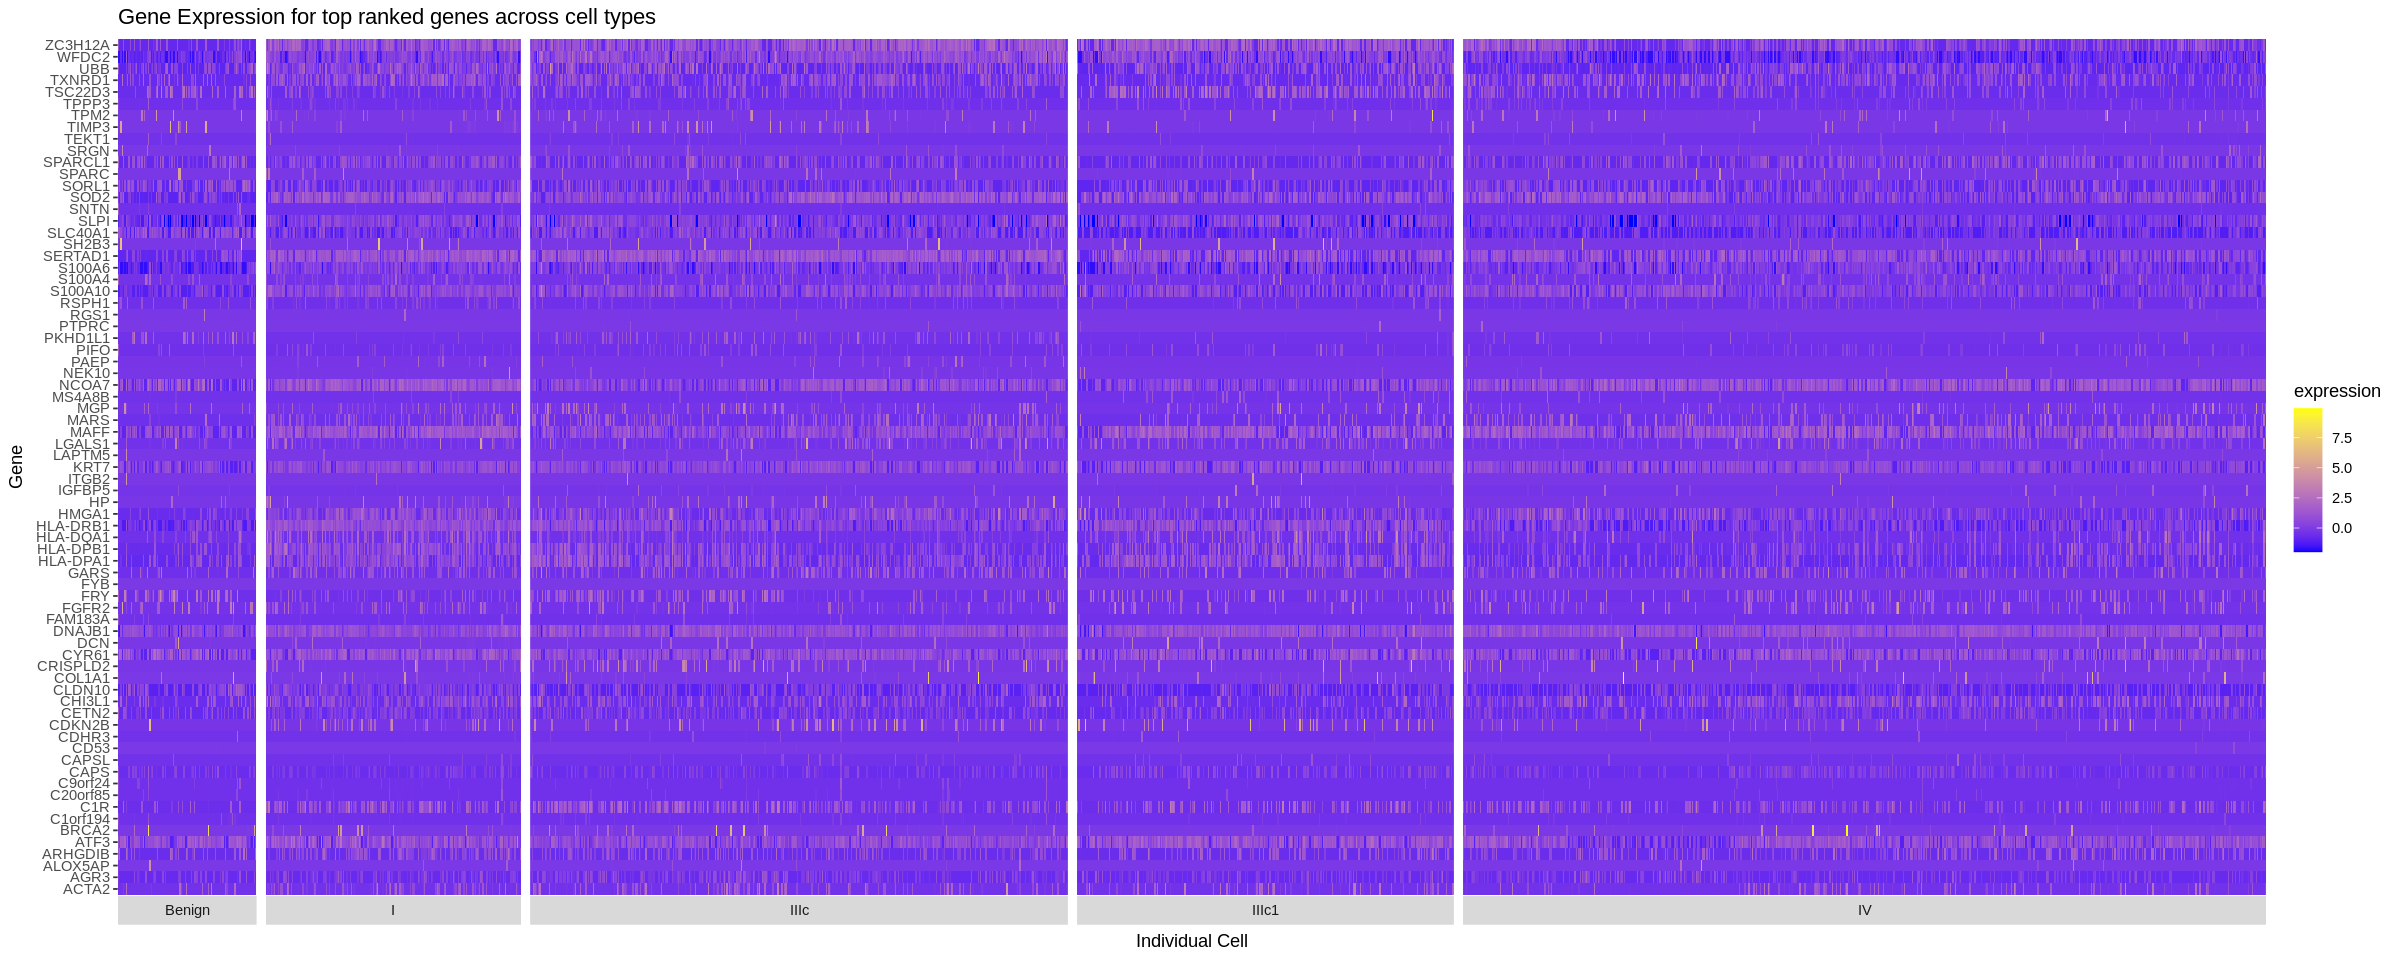

In [ ]:
options(repr.plot.width = 20, repr.plot.height =8)
exp_heatmap <- ggplot(data = exp_long, mapping = aes(x = CellID,
                                                     y = gene,
                                                     fill = expression)) +
  geom_tile() +
  xlab(label = "Individual Cell") +
  ylab(label = "Gene") +
  ggtitle(label = "Gene Expression for top ranked genes across cell types") +
  facet_grid(~ Disease_stage, switch = "x", scales = "free", space = "free") +
  theme(axis.ticks.x=element_blank(),
        axis.text.x = element_blank())+
  scale_fill_gradient(low = "blue", high = "yellow")
exp_heatmap